## House Prices: Advanced Regression

In [516]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows',None)
from warnings import filterwarnings as w
w('ignore')


#preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.impute import SimpleImputer
from datetime import date
from sklearn.feature_selection import SelectKBest, chi2

#models
import sklearn
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [517]:
dataset = pd.read_csv("data/train.csv")
data = dataset.copy()

test = pd.read_csv("data/test.csv")



In [518]:
#MSSubClass:   One-Hot Encode this variable.
data['MSSubClass'].value_counts().sort_index()

#MSZoning: One hot encode this feature
#filling null values for test set only
imputer = SimpleImputer(strategy = 'most_frequent')
test['MSZoning'] = imputer.fit_transform(np.array(test['MSZoning']).reshape(-1,1))


#Street: One-Hot Encode 'Street'
print(data['Street'].value_counts())

Pave    1454
Grvl       6
Name: Street, dtype: int64


# Handling Null Values

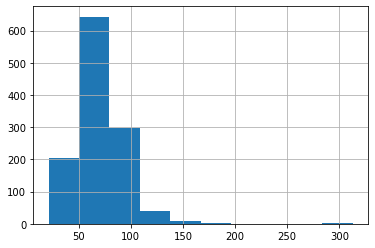

In [519]:

# LotFrontage: 
data['LotFrontage'].value_counts().sort_index() #110 unique values

data['LotFrontage'].hist()
plt.show()
#As the distribution of 'LotFrontage' is almost normal, we can impute the feature using the mean or median

imputer = SimpleImputer(strategy = 'mean')
data['LotFrontage'] = imputer.fit_transform(np.array(data['LotFrontage']).reshape(-1,1))
test['LotFrontage'] = imputer.transform(np.array(test['LotFrontage']).reshape(-1,1))

In [520]:
# Alley: One-Hot Encode
#print(data["Alley"].value_counts())

data['Alley'].fillna('No Alley Access', inplace = True)
test['Alley'].fillna('No Alley Access', inplace = True)


In [521]:
#Utilities:  Dropping Utilities as there is only one value
#train
data.drop('Utilities', axis =1, inplace =True)
#test
test.drop('Utilities', axis = 1, inplace =True)


In [522]:
#Exterior1st and Exterior2nd: null values

#only test set
imputer = SimpleImputer(strategy = 'most_frequent')
test['Exterior1st'] = imputer.fit_transform(np.array(test['Exterior1st']).reshape(-1,1))
test['Exterior2nd'] = imputer.fit_transform(np.array(test['Exterior2nd']).reshape(-1,1))

#MasVnrType: null values
#train
data['MasVnrType'] = imputer.fit_transform(np.array(data['MasVnrType']).reshape(-1,1))
#test
test['MasVnrType'] = imputer.transform(np.array(test['MasVnrType']).reshape(-1,1))

In [523]:
#MasVnrArea: handling null values
imputer = SimpleImputer(strategy = 'mean')
#distribution
#plt.figure(figsize  = (6,6))
#data['MasVnrArea'].hist()
#plt.axvline(data['MasVnrArea'].mean())
#plt.show()

#train
data['MasVnrArea'] = imputer.fit_transform(np.array(data['MasVnrArea']).reshape(-1,1))
#test
test['MasVnrArea'] =  imputer.transform(np.array(test['MasVnrArea']).reshape(-1,1))

In [524]:
#ExterQual and ExterCond
#Feature Engineer the values into integers 

#train
data['ExterQual'] = data['ExterQual'].apply(lambda x: 5 if x=='Ex' 
                                            else 4 if x=='Gd' else 3 if x=='TA' else 2 if x=='Fa' else 1 if x=='Po' else 0)
data['ExterCond'] = data['ExterCond'].apply(lambda x: 5 if x=='Ex' 
                                            else 4 if x=='Gd' else 3 if x=='TA' else 2 if x=='Fa' else 1 if x=='Po' else 0)


#test
test['ExterQual'] = test['ExterQual'].apply(lambda x: 5 if x=='Ex' 
                                            else 4 if x=='Gd' else 3 if x=='TA' else 2 if x=='Fa' else 1 if x=='Po' else 0)
test['ExterCond'] = test['ExterCond'].apply(lambda x: 5 if x=='Ex' 
                                            else 4 if x=='Gd' else 3 if x=='TA' else 2 if x=='Fa' else 1 if x=='Po' else 0)




In [525]:
#BsmtQual and BsmtCond
#handle null and feature engineer ranks

#train
data['BsmtQual'] = data['BsmtQual'].apply(lambda x: 5 if x=='Ex' else 4 if x=='Gd' else 3 if x=='TA' 
                                          else 2 if x=='Fa' else 1 if x=='Po' else 0)
data['BsmtCond'] = data['BsmtCond'].apply(lambda x: 5 if x=='Ex' else 4 if x=='Gd' else 3 if x=='TA' 
                                          else 2 if x=='Fa' else 1 if x=='Po' else 0)

#test
test['BsmtQual'] = test['BsmtQual'].apply(lambda x: 5 if x=='Ex' else 4 if x=='Gd' else 3 if x=='TA' 
                                          else 2 if x=='Fa' else 1 if x=='Po' else 0)
test['BsmtCond'] = test['BsmtCond'].apply(lambda x: 5 if x=='Ex' else 4 if x=='Gd' else 3 if x=='TA' 
                                          else 2 if x=='Fa' else 1 if x=='Po' else 0)


# BsmtExposure 
data['BsmtExposure'] = data['BsmtExposure'].apply(lambda x: 4 if x=='Gd' else 3 if x=='Av' else 2 if x=='Mn' 
                                          else 1 if x=='No' else 0)

test['BsmtExposure'] = test['BsmtExposure'].apply(lambda x: 4 if x=='Gd' else 3 if x=='Av' else 2 if x=='Mn' 
                                          else 1 if x=='No' else 0)


# BsmtFinType1
data['BsmtFinType1'] = data['BsmtFinType1'].apply(lambda x: 6 if x=='GLQ' else 5 if x=='ALQ' else 4 if x=='BLQ' 
                                          else 3 if x=='Rec' else 2 if x=='LwQ' else 1 if x=='Unf ' else 0)

test['BsmtFinType1'] = test['BsmtFinType1'].apply(lambda x: 6 if x=='GLQ' else 5 if x=='ALQ' else 4 if x=='BLQ' 
                                          else 3 if x=='Rec' else 2 if x=='LwQ' else 1 if x=='Unf ' else 0)


                

In [526]:
#BsmtFinSF1: one null value
#only test
imputer = SimpleImputer(strategy = 'mean')
test['BsmtFinSF1'] = imputer.fit_transform(np.array(test['BsmtFinSF1']).reshape(-1,1))


# BsmtFinType2
#train
data['BsmtFinType2'] = data['BsmtFinType2'].apply(lambda x: 6 if x=='GLQ' else 5 if x=='ALQ' else 4 if x=='BLQ' 
                                          else 3 if x=='Rec' else 2 if x=='LwQ' else 1 if x=='Unf ' else 0)
#test
test['BsmtFinType2'] = test['BsmtFinType2'].apply(lambda x: 6 if x=='GLQ' else 5 if x=='ALQ' else 4 if x=='BLQ' 
                                          else 3 if x=='Rec' else 2 if x=='LwQ' else 1 if x=='Unf ' else 0)



# BsmtFinSF2 
#only test
test['BsmtFinSF2'] = imputer.fit_transform(np.array(test['BsmtFinSF2']).reshape(-1,1))


# BsmtUnfSF: handle null values: 1 null
#only test
test['BsmtUnfSF'] = imputer.fit_transform(np.array(test['BsmtUnfSF']).reshape(-1,1))



# TotalBsmtSF: handle null values: 1 null
#only test
test['TotalBsmtSF'] = imputer.fit_transform(np.array(test['TotalBsmtSF']).reshape(-1,1))



In [527]:


#46th id in test
# Electrical: null values handling
#only train
imputer = SimpleImputer(strategy = 'most_frequent')
data['Electrical'] = imputer.fit_transform(np.array(data['Electrical']).reshape(-1,1))



# BsmtFullBath: Basement full bathrooms
# only test
test['BsmtFullBath'] = imputer.fit_transform(np.array(test['BsmtFullBath']).reshape(-1,1)).astype(int)


# BsmtHalfBath: Basement half bathrooms
test['BsmtHalfBath'] = imputer.fit_transform(np.array(test['BsmtHalfBath']).reshape(-1,1)).astype(int)


In [528]:
# KitchenQual
#test only
test['KitchenQual'] = imputer.fit_transform(np.array(test['KitchenQual']).reshape(-1,1))

#feature engineer 'KitchenQual'
data['KitchenQual'] = data['KitchenQual'].apply(lambda x: 5 if x=='Ex' else 4 if x=='Gd' else 3 if x=='TA' 
                                                else 2 if x=='Fa' else 1 if x=='Po' else 0)
test['KitchenQual'] = test ['KitchenQual'].apply(lambda x: 5 if x=='Ex' else 4 if x=='Gd' else 3 if x=='TA' 
                                                else 2 if x=='Fa' else 1 if x=='Po' else 0)

# Functional
test['Functional'] = imputer.fit_transform(np.array(test['Functional']).reshape(-1,1))

    
# FireplaceQu
#train
data['FireplaceQu'] = data['FireplaceQu'].apply(lambda x: 5 if x=='Ex' else 4 if x=='Gd' else 3 if x=='TA' 
                                                else 2 if x=='Fa' else 1 if x=='Po' else 0)
test['FireplaceQu'] = test['FireplaceQu'].apply(lambda x: 5 if x=='Ex' else 4 if x=='Gd' else 3 if x=='TA' 
                                                else 2 if x=='Fa' else 1 if x=='Po' else 0)

    

In [529]:
#GarageType: one hot encode
#train
data['GarageType'].fillna('No Garage', inplace = True)
test['GarageType'].fillna('No Garage', inplace = True)


#GarageYrBlt: handle null values
data['GarageYrBlt'].fillna(date.today().year, inplace = True)
test['GarageYrBlt'].fillna(date.today().year, inplace = True)

#feature engineer it to make 'GarageAge'
data['GarageAge'] = data['GarageYrBlt'].apply(lambda x: int(date.today().year-x))
test['GarageAge'] = test['GarageYrBlt'].apply(lambda x: int(date.today().year-x))
data.drop('GarageYrBlt', axis = 1, inplace =True)
test.drop('GarageYrBlt', axis = 1, inplace =True)


#GarageFinish: handle null values: put 0
data['GarageFinish'] = data['GarageFinish'].apply(lambda x: 3 if x=='Fn' else 2 if x=='RFn' 
                                                  else 1 if x=='Ufn' else 0)
test['GarageFinish'] = test['GarageFinish'].apply(lambda x: 3 if x=='Fn' else 2 if x=='RFn' 
                                                  else 1 if x=='Ufn' else 0)
    
    
    
#GarageCars:
#only test

test['GarageCars'].fillna(0, inplace = True)
test['GarageCars'] = test['GarageCars'].astype(int)

#GarageArea
#only test
imputer = SimpleImputer(strategy = 'mean')
test['GarageArea'] = imputer.fit_transform(np.array(test['GarageArea']).reshape(-1,1))


#GarageQual and GarageCond:
#train
data['GarageQual'] = data['GarageQual'].apply(lambda x: 5 if x=='Ex' else 4 if x=='Gd' else 3 if x=='TA' 
                                                else 2 if x=='Fa' else 1 if x=='Po' else 0)
data['GarageCond'] = data['GarageCond'].apply(lambda x: 5 if x=='Ex' else 4 if x=='Gd' else 3 if x=='TA' 
                                                else 2 if x=='Fa' else 1 if x=='Po' else 0)

#test
test['GarageQual'] = test['GarageQual'].apply(lambda x: 5 if x=='Ex' else 4 if x=='Gd' else 3 if x=='TA' 
                                                else 2 if x=='Fa' else 1 if x=='Po' else 0)
test['GarageCond'] = test['GarageCond'].apply(lambda x: 5 if x=='Ex' else 4 if x=='Gd' else 3 if x=='TA' 
                                                else 2 if x=='Fa' else 1 if x=='Po' else 0)


In [530]:
#PoolQC : handle null values: put 0

#train
data['PoolQC'] = data['PoolQC'].apply(lambda x: 4 if x=='Ex' else 3 if x=='Gd' else 2 if x=='TA' 
                                      else 1 if x=='Fa' else 0)
#test
test['PoolQC'] = test['PoolQC'].apply(lambda x: 4 if x=='Ex' else 3 if x=='Gd' else 2 if x=='TA' 
                                      else 1 if x=='Fa' else 0)


# HeatingQC: feature engineer by adding labels
data['HeatingQC'] = data['HeatingQC'].apply(lambda x: 5 if x=='Ex' else 4 if x=='Gd' else 3 if x=='TA' 
                                                else 2 if x=='Fa' else 1 if x=='Po' else 0)
test['HeatingQC'] = test['HeatingQC'].apply(lambda x: 5 if x=='Ex' else 4 if x=='Gd' else 3 if x=='TA' 
                                                else 2 if x=='Fa' else 1 if x=='Po' else 0)


# Fence : fill null values with 'No fence'
data['Fence'].fillna('No Fence', inplace =True)
test['Fence'].fillna('No Fence', inplace =True)


# MiscFeature
#train
data['MiscFeature'].fillna('None', inplace = True)
test['MiscFeature'].fillna('None', inplace = True)



# SaleType 
#only test
imputer = SimpleImputer(strategy = 'most_frequent')
test['SaleType'] = imputer.fit_transform(np.array(test['SaleType']).reshape(-1,1))



In [531]:
# YrSold:  Sold how many years after buying
data['soldafter']  = data.apply(lambda x: int(x['YrSold']-x['YearBuilt']), axis=1)
data.drop('YrSold', axis = 1, inplace =True)
test['soldafter']  = test.apply(lambda x: int(x['YrSold']-x['YearBuilt']), axis=1)
test.drop('YrSold', axis = 1, inplace =True)



# YearBuilt: create houseage variable
data['houseage']  = data['YearBuilt'].apply(lambda x: int(date.today().year - x))
data.drop('YearBuilt', axis=1, inplace =True)
test['houseage']  = test['YearBuilt'].apply(lambda x: int(date.today().year - x))
test.drop('YearBuilt', axis=1, inplace =True)

# YearRemodAdd
data['Sinceremod'] = data['YearRemodAdd'].apply(lambda x: int(date.today().year-x))
data.drop('YearRemodAdd', axis = 1, inplace =True)
test['Sinceremod'] = test['YearRemodAdd'].apply(lambda x: int(date.today().year-x))
test.drop('YearRemodAdd', axis = 1, inplace =True)

#remoddone: a feature to indicate if remod was done
data['remodone?'] = data.apply(lambda x: 0 if x['houseage']==x['Sinceremod'] else 1, axis=1)
test['remodone?'] = test.apply(lambda x: 0 if x['houseage']==x['Sinceremod'] else 1, axis=1)



In [532]:
#Some tweaks to equalize columns of train and test

data = data[~data['Condition2'].isin(['RRNn','RRAn','RRAe'])] #these columns not in test
test.loc[4,'HouseStyle'] = '2.5Fin' #2.5Fin value not in test['HouseStyle'], so one value is replaced with '2.5Fin'
data = data[~data['RoofMatl'].isin(['Roll','ClyTile','Membran','Metal'])] #these columns not in test
test.loc[3,'Exterior1st'] = 'Stone' #this value not in test set
test.loc[15,'Exterior1st'] = 'ImStucc' #this value not in test set
test.loc[22,'Exterior2nd'] = 'Other' #this value not in test set
test.loc[11,'Heating'] = 'OthW' #this value not in test set
test.loc[15,'Heating'] = 'Floor' #this value not in test set
test.loc[9,'Electrical'] = 'Mix' #this value not in test set
data = data[data['MiscFeature'] != 'TenC']

In [533]:
var = 'SaleCondition'
print(len(data[var].value_counts()))
print("-----------")
print(len(test[var].value_counts()))
print("---------------------------------------------")
print(data[var].value_counts())
print("-----------")
print(test[var].value_counts())

6
-----------
6
---------------------------------------------
Normal     1190
Partial     124
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64
-----------
Normal     1204
Partial     120
Abnorml      89
Family       26
Alloca       12
AdjLand       8
Name: SaleCondition, dtype: int64


In [534]:
cat_vars = ['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','LotConfig','LandSlope','Neighborhood',
            'Condition1','Condition2','BldgType','HouseStyle','remodone?','RoofStyle','RoofMatl','Exterior1st',
            'Exterior2nd','MasVnrType','Foundation','Heating','CentralAir','Electrical','Functional','GarageType',
            'PavedDrive','Fence','MiscFeature','SaleType','SaleCondition']
       
    
# Separating categorical and numerical variables   
data['MSSubClass'] = data['MSSubClass'].astype(str)
test['MSSubClass'] = test['MSSubClass'].astype(str)


data_cat = data[cat_vars]
data_num = data.drop(cat_vars, axis = 1)
data_numy = data_num.copy().drop('Id', axis = 1)
data_num.drop(['SalePrice','Id'], axis=1, inplace = True)


num_vars = data_num.columns #names of all numerical features

test_cat = test[cat_vars]
test_num = test.drop(cat_vars, axis = 1)
test_num.drop('Id', axis = 1, inplace = True)



In [535]:
# declare a standardscaler for the 'Target'
ytrain = data['SalePrice']
target_scaler = MinMaxScaler()
ytrain_scaled = target_scaler.fit_transform(np.array(ytrain).reshape(-1,1))
ytrain_scaled = pd.Series(ytrain_scaled.flatten(), name = 'SalePrice')

In [536]:
# standardize the numerical variables
scaler = StandardScaler()
data_num_s = scaler.fit_transform(data_num)
test_num_s = scaler.transform(test_num)

#convert into dataframe
data_num_s = pd.DataFrame(data_num_s, columns = num_vars)
test_num_s = pd.DataFrame(test_num_s, columns = num_vars)

In [537]:
#to keep the xtrain and ytrain row numbers same, we keep them together and then split them later

data_num_s = pd.concat([data_num_s, ytrain_scaled], axis = 1)

In [538]:
#one hot encode the categorical variables

data_cat_dum = pd.get_dummies(data_cat, drop_first=True)
test_cat_dum = pd.get_dummies(test_cat, drop_first = True)
test_cat_dum.drop('MSSubClass_150', axis = 1, inplace = True) #this column is not present in train set


## Feature Selection

### SelectKBest

In [539]:
chifeats = SelectKBest(score_func = chi2, k=10) #gives top 10 features with highest chi2 values using get_support()
bestfeatures = c hifeats.fit(data_num,ytrain)
bestfeatures.scores_  #returns ALL columns with their chi2 scores

bestfeats = pd.DataFrame({'cols': data_num.columns, 'scores': bestfeatures.scores_}) 
bestfeats = bestfeats.nlargest(20, 'scores') #only 10 are selected


bfeats = list(bestfeats['cols']) #contains columns names
data_num = data_num[bfeats]
test_num = test_num[bfeats]

"\nchifeats = SelectKBest(score_func = chi2, k=10) #gives top 10 features with highest chi2 values using get_support()\nbestfeatures = chifeats.fit(data_num,ytrain)\nbestfeatures.scores_  #returns ALL columns with their chi2 scores\n\nbestfeats = pd.DataFrame({'cols': data_num.columns, 'scores': bestfeatures.scores_}) \nbestfeats = bestfeats.nlargest(20, 'scores') #only 10 are selected\n\n\nbfeats = list(bestfeats['cols']) #contains columns names\ndata_num = data_num[bfeats]\ntest_num = test_num[bfeats]\n"

### Correlation Matrix

In [540]:
corr_feats = ['OverallQual','ExterQual','BsmtQual','BsmtFinSF1','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','KitchenQual','TotRmsAbvGrd','FireplaceQu','GarageCars','soldafter','houseage','Sinceremod']
data_num = data_num[corr_feats]
test_num = test_num[corr_feats]

In [ ]:
# Transforming into a normal distribution

skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)

### Combine processed DataFrames

In [541]:
# Concat the scaled and the dummies

xtrain = pd.concat([data_num,data_cat_dum], axis = 1)


#scaled numerical features are concatenated
xtrain_scaled = pd.concat([data_num_s,data_cat_dum], axis = 1)
xtrain_scaled = xtrain_scaled.iloc[:1451,:] #the last 9 values are NaN, only till 1451 is taken


#get rid of remaining null values
xtrain_scaled = xtrain_scaled.dropna(axis=0, subset=['remodone?'])

#split xtrain and ytrain now
ytrain_scaled = xtrain_scaled['SalePrice']
xtrain_scaled.drop('SalePrice', axis = 1, inplace = True)



#TEST SET
xtest  = pd.concat([test_num,test_cat_dum], axis = 1)
xtest_scaled  = pd.concat([test_num_s,test_cat_dum], axis = 1)


## Models

In [542]:
# Functions: Write to CSV
def make_csv_lr(mdl,xt_scaled):
    SalePrice = mdl.predict(xt_scaled)
    SalePrice = target_scaler.inverse_transform(np.array(SalePrice).reshape(-1,1))
    SalePrice = pd.Series(SalePrice.reshape(len(SalePrice),))
    output = pd.DataFrame({'Id': test['Id'], 'SalePrice': SalePrice})
    output.to_csv('linear.csv', index=False)

    
def make_csv(mdl,xtest):
    SalePrice = mdl.predict(xtest)
    output = pd.DataFrame({'Id': test['Id'], 'SalePrice': SalePrice})
    output.to_csv('rf.csv', index=False)
    

In [543]:
# Linear model

model = LinearRegression()
kfold = KFold(n_splits = 5, shuffle = True)
model.fit(xtrain_scaled, ytrain_scaled)
print("LR: ",np.mean(cross_val_score(model, xtrain_scaled, ytrain_scaled, cv = kfold, scoring = 'neg_root_mean_squared_error')))

make_csv_lr(model, xtest_scaled)


'\nmodel = LinearRegression()\nkfold = KFold(n_splits = 5, shuffle = True)\nmodel.fit(xtrain_scaled, ytrain_scaled)\nprint("LR: ",np.mean(cross_val_score(model, xtrain_scaled, ytrain_scaled, cv = kfold, scoring = \'neg_root_mean_squared_error\')))\n\nmake_csv_lr(model, xtest_scaled)\n'

In [544]:
# Random Forest

rf = RandomForestRegressor(n_estimators = 500)
rf.fit(xtrain,ytrain)
kfold = KFold(n_splits = 5, shuffle = True)
print("RF: ", np.mean(cross_val_score(rf, xtrain, ytrain, cv = kfold, scoring = 'neg_root_mean_squared_error')))

make_csv(rf, xtest)


'\nrf = RandomForestRegressor(n_estimators = 500)\nrf.fit(xtrain,ytrain)\nkfold = KFold(n_splits = 5, shuffle = True)\nprint("RF: ", np.mean(cross_val_score(rf, xtrain, ytrain, cv = kfold, scoring = \'neg_root_mean_squared_error\')))\n\nmake_csv(rf, xtest)\n\n'

In [545]:
#Hyperparameter Tuning: Grid Search

rf_grid = RandomForestRegressor()
params = {'n_estimators':[100,200,300,400,500], 'criterion': ['mse','mae'], 'max_depth':[20,30,40,50,60,None], 
          'max_features': ['auto', 'sqrt', 'log2'], 'min_impurity_decrease':[0.1,0.2], 'min_impurity_split':[0.1,0.2]}
grid_model = RandomizedSearchCV(rf_grid, cv=5, param_distributions = params, scoring = 'r2', verbose = 1)
grid_model.fit(xtrain,ytrain)

 
print("Grid search score is: ", grid_model.best_score_)
print("Grid search estimator: ", grid_model.best_estimator_)

make_csv(grid_model, xtest)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 12.3min finished


Grid search score is:  0.8672152287627857
Grid search estimator:  RandomForestRegressor(criterion='mae', min_impurity_decrease=0.1,
                      min_impurity_split=0.2, n_estimators=300)


## THE END